DETECTING FAKE MOVIE REVIEWS USING KNN

In [ ]:
#Importing Essentials
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "drive/MyDrive/Team 2/DATASETS"


'DATASET opinions.tsv'	'DATASET test.xlsx'  'DATASET train.xlsx'


In [ ]:
!ls

drive  logs.log  sample_data


In [ ]:
dataframe = pd.read_table('drive/MyDrive/Team 2/DATASETS/DATASET opinions.tsv',header=None,skiprows=1,names=['Sentiment','Review'])


In [ ]:
dataframe.head(3)

,Sentiment,Review
0,1,this was the first clive cussler i've ever rea...
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.


In [ ]:
dataframe.columns

Index(['Sentiment', 'Review'], dtype='object')

Before We feed any Data to Our Model. It Must be In Numeric Form. Hence using label encoder to convert the same 

In [ ]:
import sklearn as sk
from sklearn import preprocessing   

In [ ]:
le = preprocessing.LabelEncoder()           # Instance of Label Encoder Created 

In [ ]:
dataframe['Sentiment'] = le.fit_transform(dataframe['Sentiment'])

In [ ]:
dataframe.tail(4)

,Sentiment,Review
6913,0,So Brokeback Mountain was really depressing.
6914,0,"As I sit here, watching the MTV Movie Awards, ..."
6915,0,Ok brokeback mountain is such a horrible movie.
6916,0,"Oh, and Brokeback Mountain was a terrible movie."


Keeping Rwview field as our Input on X Axis
N Sentiment will be our output i.e on Y Axis

In [ ]:
X = dataframe.Review
Y = dataframe.Sentiment

###Using CountVectorizer to convert text into tokens/features

In [ ]:


vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

#Using training data to transform text into counts of features for each message

vect.fit(X_train)
X_train_dtm = vect.transform(X_train) 
X_test_dtm = vect.transform(X_test)

In [ ]:
model = KNeighborsClassifier (n_neighbors = 4)
model.fit(X_train_dtm,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# we will save the predicted values in Y_predicted and then compare it with Y_test to get the accuracy

Y_predicted =   model.predict(X_test_dtm)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(Y_predicted, Y_test)*100)

98.38150289017341


In [ ]:
k=[]
acc = []

for i in range(1,10):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train_dtm,Y_train)
  Y_predicted = model.predict(X_test_dtm)
  ac = (accuracy_score(Y_predicted, Y_test)*100);
  k.append(i);
  acc.append(ac);

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sb

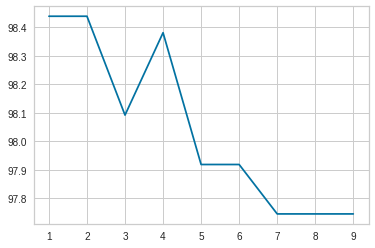

In [ ]:
sb.lineplot(k,acc);

In [ ]:
model = KNeighborsClassifier (n_neighbors = 4)
model.fit(X_train_dtm,Y_train)
Y_predicted =   model.predict(X_test_dtm)
print(accuracy_score(Y_predicted, Y_test)*100)

98.38150289017341


Cross Validation. To Basically avoid the issues of overfiting & generalize the model as well.

An average score of how our model is performing on the dataset

The Input DataSet is Divided into small fragments.
n our model is tested on to it.

Overfitting makes the model relevant to its data set only, and irrelevant to any other data sets.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(model,X,Y, cv=10)          # CV here indicates division factor of our dataset, if its 100 in total, it will be divided into 10 datasets and tested

# Using Pycaret to train & Improve our Model

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 6.8 MB/s 
     |████████████████████████████████| 10.4 MB 38.4 MB/s 
     |████████████████████████████████| 167 kB 57.3 MB/s 
     |████████████████████████████████| 88 kB 8.3 MB/s 
     |████████████████████████████████| 1.3 MB 43.7 MB/s 
     |████████████████████████████████| 262 kB 52.8 MB/s 
     |████████████████████████████████| 56 kB 6.1 MB/s 
     |████████████████████████████████| 6.8 MB 52.9 MB/s 
     |████████████████████████████████| 1.7 MB 46.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 120 kB 58.3 MB/s 
     |████████████████████████████████| 2.0 MB 53.7 MB/s 
     |████████████████████████████████| 17.8 MB 36.1 MB/s 
     |████████████████████████████████|

In [ ]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install markupsafe==2.0.1


ImportError: ignored

In [ ]:
pip install -U --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 7.4 MB/s 
     |████████████████████████████████| 105 kB 58.0 MB/s 
     |████████████████████████████████| 199 kB 58.6 MB/s 
     |████████████████████████████████| 15.7 MB 48.4 MB/s 
     |████████████████████████████████| 24.8 MB 1.6 MB/s 
     |████████████████████████████████| 69 kB 7.6 MB/s 
     |████████████████████████████████| 6.7 MB 26.1 MB/s 
     |████████████████████████████████| 79.9 MB 128 kB/s 
     |████████████████████████████████| 9.8 MB 41.8 MB/s 
     |████████████████████████████████| 274 kB 64.8 MB/s 
     |████████████████████████████████| 3.3 MB 37.7 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 11.2 MB 61.5 MB/s 
     |████████████████████████████████| 281 kB 62.6 MB/s 
     |████████████████████████████████| 1.4 MB 45.3 MB/s 
     |████████████████████████████

In [ ]:
import jinja2
from pycaret.classification import *

In [ ]:
pip uninstall scikit-learn

Found existing installation: scikit-learn 0.23.2
Uninstalling scikit-learn-0.23.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.23.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-3300acd3.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)?   ERROR: Operation cancelled by user


In [ ]:
!pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
sktime 0.12.0 requires scikit-learn<1.2.0,>=0.24.0, but you have scikit-learn 0.23.2 which is incompatible.
pycaret 3.0.0rc2 requires scikit-learn>=1.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.23.2 which is incompatible.


SYNTAX TO SETUP PYCARET


exp = setup(data=dataframe,target='output which our model predicts')

In [ ]:
exp = setup(data=dataframe,target='Sentiment')

,Description,Value
0,Session id,3715
1,Target,Sentiment
2,Target type,Binary
3,Original data shape,"(6917, 2)"
4,Transformed data shape,"(6917, 2)"
5,Transformed train set shape,"(4841, 2)"
6,Transformed test set shape,"(2076, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

[]

In [ ]:
model = create_model("knn")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:15:01
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

BrokenProcessPool: ignored

In [ ]:
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
tuned_knn = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9031,0.9832,0.8321,1.0,0.9084,0.8074,0.8228
1,0.9153,0.9849,0.8530,1.0,0.9207,0.8310,0.8431
2,0.9112,0.9868,0.8459,1.0,0.9165,0.8230,0.8362
3,0.8781,0.9758,0.7885,1.0,0.8818,0.7595,0.7825
4,0.9029,0.9864,0.8315,1.0,0.9080,0.8070,0.8225
5,0.9091,0.9935,0.8423,1.0,0.9144,0.8190,0.8327
6,0.9008,0.9874,0.8280,1.0,0.9059,0.8030,0.8191
7,0.8967,0.9825,0.8208,1.0,0.9016,0.7951,0.8123
8,0.9029,0.9877,0.8315,1.0,0.9080,0.8070,0.8225
9,0.8967,0.9851,0.8214,1.0,0.9020,0.7950,0.8122


After Tuning The Accuracy Increased by 1.2% 

We can see the value of n has been changed to 17 after tuning the model

In [ ]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=37, p=2,
                     weights='distance')


# Fixing Class Imbalance Problem

**Class Imbalance:** Occurs When one Class is present in Majority over Other

Classes are said to be Imbalanced if Threshold difference Between both classes is around 60% ~ 40% [60% to 40%]

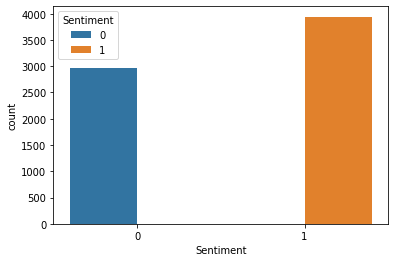

In [ ]:
import seaborn as sb
sb.countplot(x="Sentiment", data = dataframe, hue = "Sentiment")            # Here countplot y axis by default will be count
# SO out of 183 People 60 Died in Titanic

In [ ]:
exp = setup(data=dataframe,target='Sentiment',fix_imbalance=True)

In [ ]:
model1 = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9052,0.9185,0.8333,1.0,0.9091,0.8117,0.8264
1,0.8843,0.9004,0.7971,1.0,0.8871,0.7715,0.7925
2,0.8967,0.9130,0.8188,1.0,0.9004,0.7953,0.8125
3,0.8884,0.9058,0.8043,1.0,0.8916,0.7794,0.7991
4,0.8926,0.9112,0.8116,1.0,0.8960,0.7873,0.8058
5,0.9070,0.9221,0.8370,1.0,0.9112,0.8152,0.8295
6,0.8946,0.9149,0.8152,1.0,0.8982,0.7913,0.8091
7,0.9008,0.9239,0.8261,1.0,0.9048,0.8033,0.8193
8,0.8946,0.9112,0.8152,1.0,0.8982,0.7913,0.8091
9,0.9050,0.9218,0.8327,1.0,0.9087,0.8113,0.8261


# Accuracy Decreased a bit but it doesnt mean the model didnt improve. It Predicts Better Output now